In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the IMDb reviews dataset
train_ds, test_ds = tfds.load('imdb_reviews', split=['train', 'test'], with_info=False)

# Initialize lists to store x_train, x_test, y_train, and y_test
x_train = []
y_train = []
x_test = []
y_test = []

# Initialize a list to store positive reviews
positive_reviews = []

# Iterate over the train dataset and extract text and labels
for example in train_ds:
    text = example['text'].numpy().decode('utf-8')
    label = example['label'].numpy()
    if label == 1:  # Positive sentiment
        positive_reviews.append(text)

    x_train.append(text)
    y_train.append(label)

# Iterate over the test dataset and extract text and labels
for example in test_ds:
    text = example['text'].numpy().decode('utf-8')
    label = example['label'].numpy()
    x_test.append(text)
    y_test.append(label)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRCXPBY/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRCXPBY/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRCXPBY/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


#Data Pre-processing

In [ ]:
# Join all positive reviews into a single string
positive_reviews_text = ' '.join(positive_reviews)

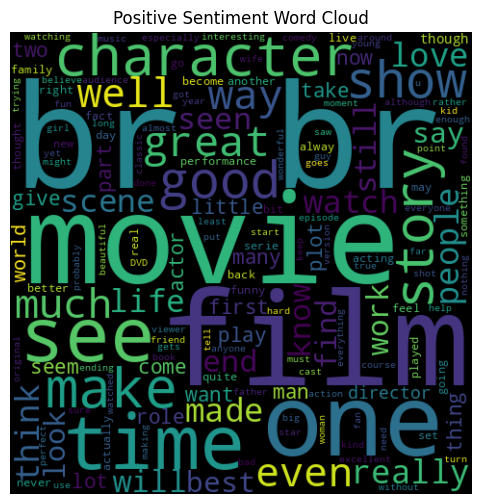

In [ ]:
#Positive Sentiment word cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 480, height = 480,
                background_color = 'black',
                stopwords = None,
                min_font_size = 10).generate(positive_reviews_text)

# Display the word cloud
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Positive Sentiment Word Cloud')

# Show plot
plt.show()

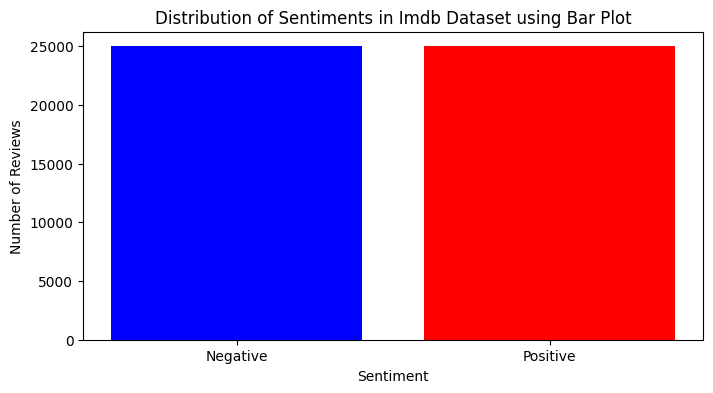

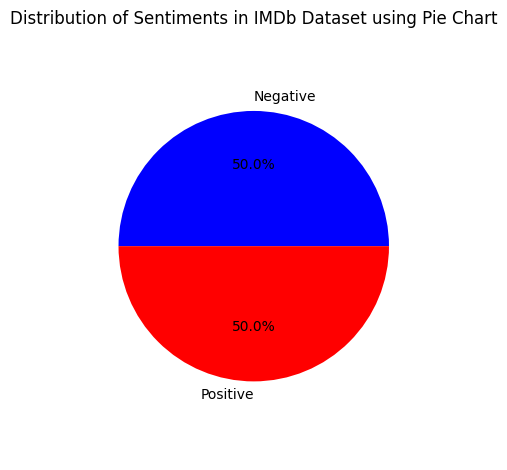

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Combine the training and testing labels
all_labels = np.concatenate((y_train, y_test), axis=0)

# Count the occurrences of each sentiment label
unique, counts = np.unique(all_labels, return_counts=True)
sentiment_counts = dict(zip(unique, counts))

# Plot the bar chat
plt.figure(figsize=(8,4))
plt.subplot(1,1,1)
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['blue', 'red'])
plt.xticks(list(sentiment_counts.keys()), ['Negative', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments in Imdb Dataset using Bar Plot')
plt.show()




# Plot the pie chart
plt.subplot(1, 2, 2)
plt.pie(sentiment_counts.values(), labels=['Negative', 'Positive'], colors=['blue', 'red'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Sentiments in IMDb Dataset using Pie Chart')
plt.tight_layout()
plt.show()


In [ ]:
x_train[:4]

["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development wa

In [ ]:
import tensorflow as tf
import re
import string
from IPython.display import display

def standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    no_tag = tf.strings.regex_replace(lowercase, "<[^>]+>", "")
    output = tf.strings.regex_replace(no_tag, "[%s]" % re.escape(string.punctuation), "")
    return output

# Convert to eager tensor
x_train_eager = tf.constant(x_train)

# Apply standardization
training = standardization(x_train_eager)

# Convert eager tensor to list of strings
training_list = [str(sentence, 'utf-8') for sentence in training.numpy()]

display(training_list[:5])
print(type(training_list))


['this was an absolutely terrible movie dont be lured in by christopher walken or michael ironside both are great actors but this must simply be their worst role in history even their great acting could not redeem this movies ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the columbian rebels were making their cases for revolutions maria conchita alonso appeared phony and her pseudolove affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actors like christopher walkens good name i could barely sit through it',
 'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the sette and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly 

<class 'list'>


In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_list)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_list)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
print("Word index:\n", word_index)
print("\nTraining sequence:\n", training_padded)
print("\nTest sequence:\n", testing_padded)

Word index:
 {'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'in': 8, 'it': 9, 'this': 10, 'i': 11, 'that': 12, 'was': 13, 'as': 14, 'with': 15, 'for': 16, 'movie': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'are': 22, 'you': 23, 'his': 24, 'have': 25, 'be': 26, 'he': 27, 'one': 28, 'its': 29, 'at': 30, 'all': 31, 'by': 32, 'an': 33, 'they': 34, 'who': 35, 'from': 36, 'like': 37, 'so': 38, 'her': 39, 'or': 40, 'just': 41, 'about': 42, 'has': 43, 'out': 44, 'if': 45, 'some': 46, 'what': 47, 'there': 48, 'good': 49, 'more': 50, 'very': 51, 'when': 52, 'she': 53, 'even': 54, 'up': 55, 'no': 56, 'would': 57, 'my': 58, 'which': 59, 'only': 60, 'time': 61, 'really': 62, 'story': 63, 'their': 64, 'were': 65, 'had': 66, 'see': 67, 'can': 68, 'me': 69, 'than': 70, 'we': 71, 'much': 72, 'been': 73, 'get': 74, 'well': 75, 'will': 76, 'into': 77, 'because': 78, 'people': 79, 'other': 80, 'also': 81, 'do': 82, 'bad': 83, 'great': 84, 'how': 85, 'first': 86, 'most': 87, 'him

In [ ]:
print("x_train shape:", training_padded.shape)
print("x_test shape:", testing_padded.shape)

x_train shape: (25000, 200)
x_test shape: (25000, 200)


In [ ]:
print(type(training_padded))
print(type(y_train))
print(type(testing_padded))
print(type(y_test))
print(type(training_list))


<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'list'>


In [ ]:
import tensorflow as tf
training_padded = tf.convert_to_tensor(training_padded)
y_train = tf.convert_to_tensor(y_train)
testing_padded = tf.convert_to_tensor(testing_padded)
y_test = tf.convert_to_tensor(y_test)

In [ ]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import re
import string
import time
from numpy import random
import gensim.downloader as api
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (Dense,Flatten,SimpleRNN,InputLayer,Conv1D,Bidirectional,GRU,LSTM,BatchNormalization,Dropout,Input, Embedding,TextVectorization)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from google.colab import files
from tensorboard.plugins import projector

#Simple RNN

In [ ]:
model=tf.keras.models.Sequential([
    Input(shape=(max_length,)),
    Embedding(vocab_size,embedding_dim),
    SimpleRNN(32, activation='tanh',
                        return_sequences=False),
    Dense(1,activation='sigmoid'),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 16)           160000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 161601 (631.25 KB)
Trainable params: 161601 (631.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/nlp/sentiment_analysis/rnn.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history=model.fit(
    training_padded, y_train, validation_data=(testing_padded, y_test),
    epochs=10,
    callbacks=[])

Epoch 1/10
782/782 [==============================] - 49s 61ms/step - loss: 0.6199 - accuracy: 0.6671 - val_loss: 0.5497 - val_accuracy: 0.7468
Epoch 2/10
782/782 [==============================] - 49s 62ms/step - loss: 0.4462 - accuracy: 0.8217 - val_loss: 0.4318 - val_accuracy: 0.8174
Epoch 3/10
782/782 [==============================] - 44s 56ms/step - loss: 0.3435 - accuracy: 0.8747 - val_loss: 0.3883 - val_accuracy: 0.8346
Epoch 4/10
782/782 [==============================] - 47s 60ms/step - loss: 0.2798 - accuracy: 0.9038 - val_loss: 0.3832 - val_accuracy: 0.8328
Epoch 5/10
782/782 [==============================] - 46s 58ms/step - loss: 0.2395 - accuracy: 0.9191 - val_loss: 0.4398 - val_accuracy: 0.8318
Epoch 6/10
782/782 [==============================] - 45s 58ms/step - loss: 0.2066 - accuracy: 0.9356 - val_loss: 0.4511 - val_accuracy: 0.8260
Epoch 7/10
782/782 [==============================] - 46s 59ms/step - loss: 0.1863 - accuracy: 0.9437 - val_loss: 0.5159 - val_accuracy:

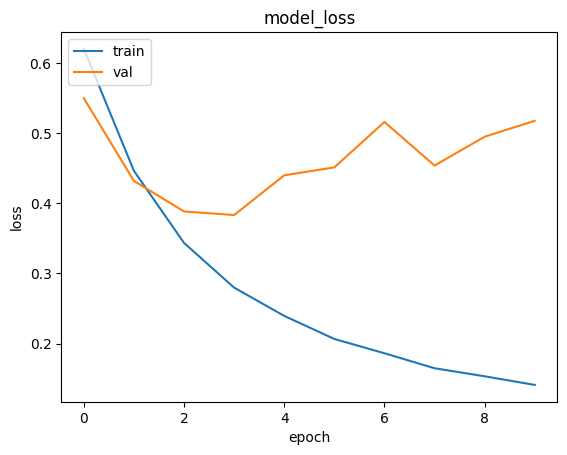

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

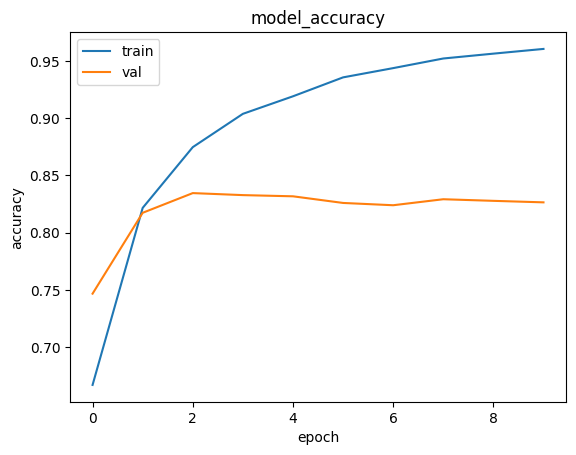

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Simple RNN
loss, accuracy = model.evaluate(testing_padded, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

782/782 [==============================] - 10s 13ms/step - loss: 0.5175 - accuracy: 0.8265
Loss: 0.5174934267997742
Accuracy: 0.8265200257301331


#LSTM

In [ ]:
model=tf.keras.models.Sequential([
    Input(shape=(max_length,)),
    Embedding(vocab_size,embedding_dim),

    LSTM(64,return_sequences=True),
    LSTM(32),

    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid'),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 16)           160000    
                                                                 
 lstm_2 (LSTM)               (None, 200, 64)           20736     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 195329 (763.00 KB)
Trainable params: 195

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/nlp/sentiment_analysis/rnn.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history= model.fit(
    training_padded, y_train, validation_data=(testing_padded, y_test),
    epochs=10,
    callbacks=[model_checkpoint_callback])

Epoch 1/10
782/782 [==============================] - 53s 62ms/step - loss: 0.6931 - accuracy: 0.5048 - val_loss: 0.6926 - val_accuracy: 0.5301
Epoch 2/10
  1/782 [..............................] - ETA: 1:21 - loss: 0.6925 - accuracy: 0.5625

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 24s 30ms/step - loss: 0.5091 - accuracy: 0.7438 - val_loss: 0.3674 - val_accuracy: 0.8372
Epoch 3/10
782/782 [==============================] - 21s 27ms/step - loss: 0.3057 - accuracy: 0.8784 - val_loss: 0.3328 - val_accuracy: 0.8542
Epoch 4/10
782/782 [==============================] - 21s 27ms/step - loss: 0.2561 - accuracy: 0.9047 - val_loss: 0.3313 - val_accuracy: 0.8540
Epoch 5/10
782/782 [==============================] - 21s 26ms/step - loss: 0.2208 - accuracy: 0.9204 - val_loss: 0.3663 - val_accuracy: 0.8478
Epoch 6/10
782/782 [==============================] - 24s 31ms/step - loss: 0.1943 - accuracy: 0.9334 - val_loss: 0.3731 - val_accuracy: 0.8503
Epoch 7/10
782/782 [==============================] - 20s 25ms/step - loss: 0.1697 - accuracy: 0.9432 - val_loss: 0.4029 - val_accuracy: 0.8451
Epoch 8/10
782/782 [==============================] - 19s 24ms/step - loss: 0.1561 - accuracy: 0.9504 - val_loss: 0.4890 - val_accuracy: 0.8399
Epo

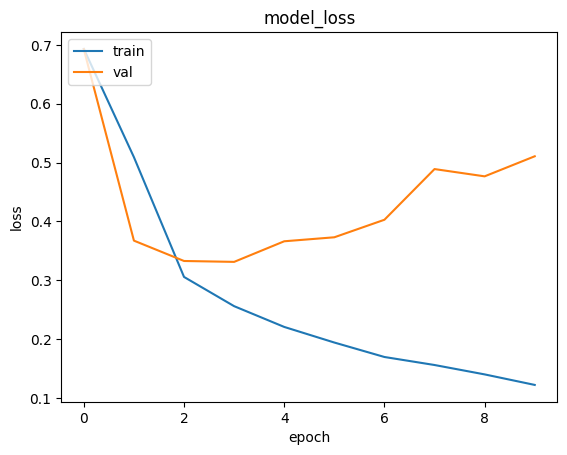

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

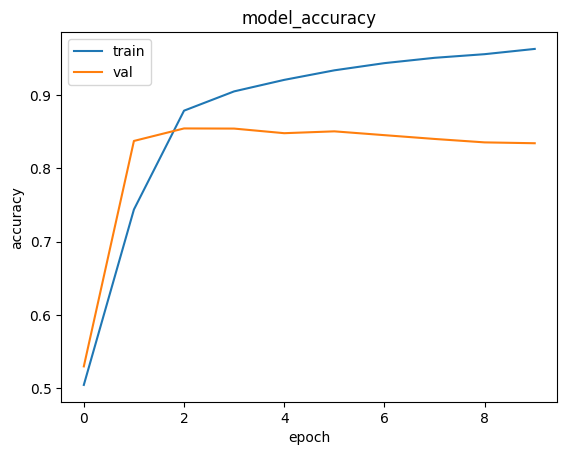

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#LSTM
loss, accuracy = model.evaluate(testing_padded, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

782/782 [==============================] - 6s 8ms/step - loss: 0.5107 - accuracy: 0.8341
Loss: 0.510688841342926
Accuracy: 0.8340799808502197


##GRU

In [ ]:
model=tf.keras.models.Sequential([
    Input(shape=(max_length,)),
    Embedding(vocab_size,embedding_dim),

    Bidirectional(GRU(64,return_sequences=True)),
    Bidirectional(GRU(32)),

    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 16)           160000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 200, 128)          31488     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                31104     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history=model.fit(
    training_padded, y_train, validation_data=(testing_padded, y_test),
    epochs=10,
    callbacks=[])

Epoch 1/10
  4/782 [..............................] - ETA: 1:44 - loss: 0.6926 - accuracy: 0.5234

KeyboardInterrupt: 

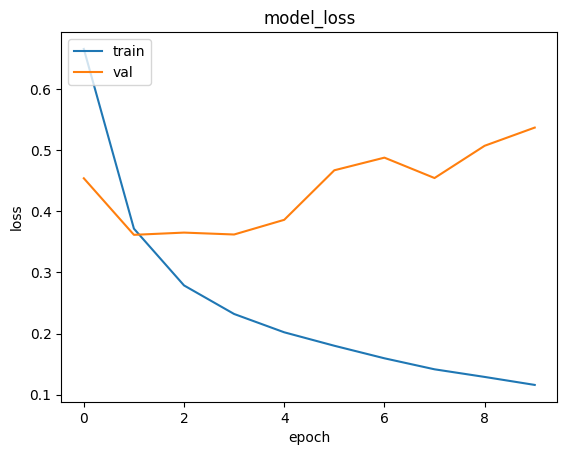

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

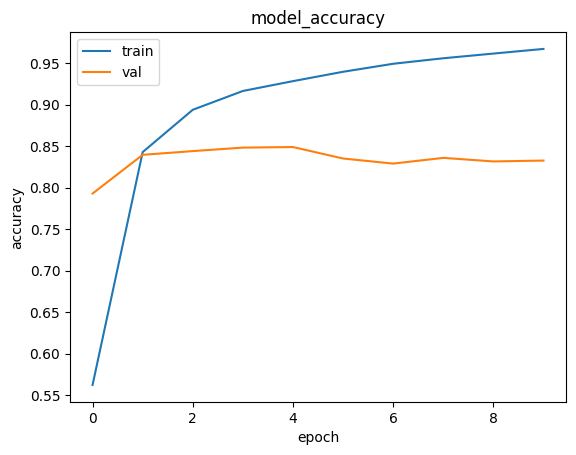

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#GRU
loss, accuracy = model.evaluate(testing_padded, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

782/782 [==============================] - 10s 13ms/step - loss: 0.5372 - accuracy: 0.8326
Loss: 0.5372454524040222
Accuracy: 0.8325999975204468


In [ ]:
#GRU
loss, accuracy = model.evaluate(training_padded, y_train)
print("Loss:", loss)
print("Accuracy:", accuracy)

782/782 [==============================] - 10s 13ms/step - loss: 0.0827 - accuracy: 0.9792
Loss: 0.08274544775485992
Accuracy: 0.9792400002479553


In [ ]:
# Using the model to predict a review
reviews = ['I love this phone', 'I hate spaghetti',
                'Everything was cold',
                'Everything was hot exactly as I wanted',
                'Everything was green',
                'the host seated us immediately',
                'they gave us free chocolate cake',
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes',
                'does not work when I stand on my head']

print(reviews)

# Creating the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(reviews)
padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

classes = model.predict(padded)

for x in range(len(reviews)):
  print(reviews[x])
  print(classes[x])
  print('\n')

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']
1/1 [==============================] - 0s 29ms/step
I love this phone
[0.8674979]


I hate spaghetti
[0.23812288]


Everything was cold
[0.78881574]


Everything was hot exactly as I wanted
[0.85658]


Everything was green
[0.86277413]


the host seated us immediately
[0.8672786]


they gave us free chocolate cake
[0.4703775]


not sure about the wilted flowers on the table
[0.96428365]


only works when I stand on tippy toes
[0.8881906]


does not work when I stand on my head
[0.93360883]




782/782 [==============================] - 10s 11ms/step


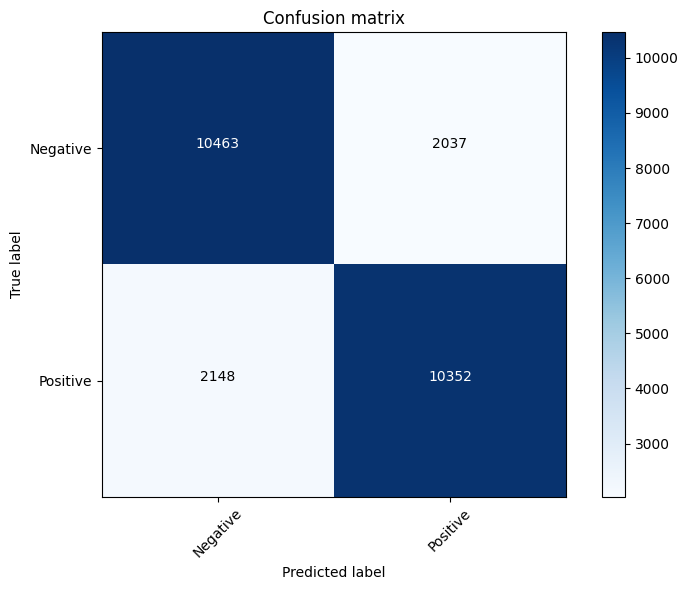

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# Make predictions on the test set
# Make predictions on the test set
y_pred_prob = model.predict(testing_padded).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)


# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion matrix')
plt.colorbar()

# Add labels to the plot
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add numbers to the plot
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

#Embedding Projector ( Visualizing the network )
The code below will download two files for visualizing how your network "sees" the sentiment related to each word. Head to http://projector.tensorflow.org/ and load these files, then click the checkbox to "sphereize" the data.

In [ ]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [ ]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>